In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
df=pd.read_csv(r"C:\Users\vivaa\OneDrive\Desktop\Loan Approval & Credit Risk Predictor\Datasets\Loan_approval_dataset.csv")

In [21]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [22]:
df.shape

(4269, 13)

In [23]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [24]:

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [25]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [26]:
df.columns=df.columns.str.strip()

In [27]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [28]:
df.duplicated().sum()

np.int64(0)

In [29]:
object=[]
for i in df.columns:
    if(df[i].dtype=='O'):
        object.append(i)

In [30]:
object

['education', 'self_employed', 'loan_status']

In [31]:
print(df['education'].value_counts())
print(df['loan_status'].value_counts())
df['self_employed'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [32]:
print(df['education'].unique())
print(df['loan_status'].unique())
print(df['self_employed'].unique())

[' Graduate' ' Not Graduate']
[' Approved' ' Rejected']
[' No' ' Yes']


In [33]:
#Encoding
df['education']=np.where(df['education']==' Not Graduate',0,1)
df['self_employed']=np.where(df['self_employed']==' No',0,1)
df['loan_status']=np.where(df['loan_status']==' Rejected',0,1)

In [34]:
print(df['education'].value_counts())
print(df['loan_status'].value_counts())
df['self_employed'].value_counts()

education
1    2144
0    2125
Name: count, dtype: int64
loan_status
1    2656
0    1613
Name: count, dtype: int64


self_employed
1    2150
0    2119
Name: count, dtype: int64

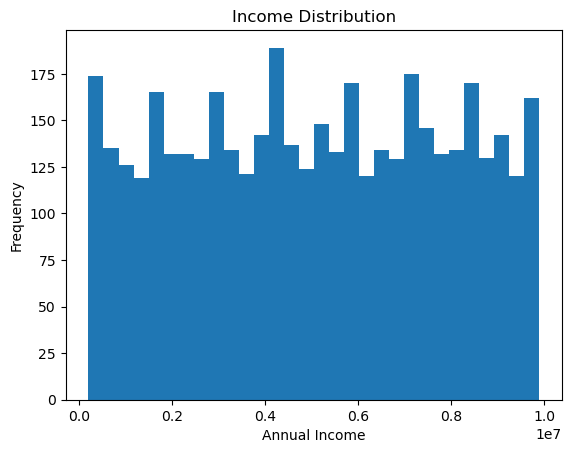

In [36]:
plt.hist(df['income_annum'], bins=30)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()


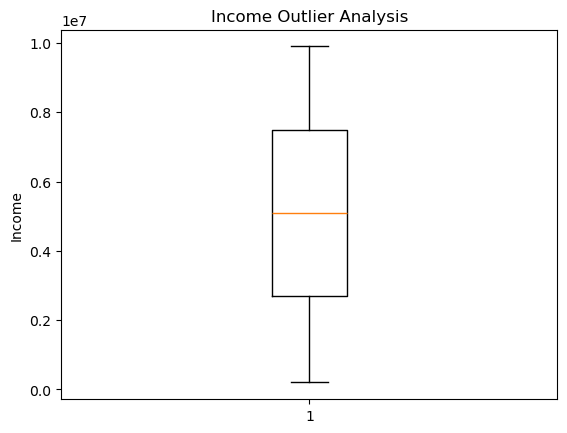

In [38]:
plt.boxplot(df['income_annum'])
plt.ylabel('Income')
plt.title('Income Outlier Analysis')
plt.show()


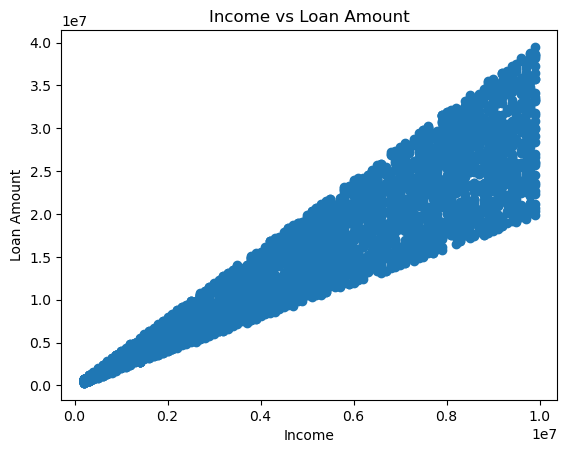

In [39]:
plt.scatter(df['income_annum'], df['loan_amount'])
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Income vs Loan Amount')
plt.show()


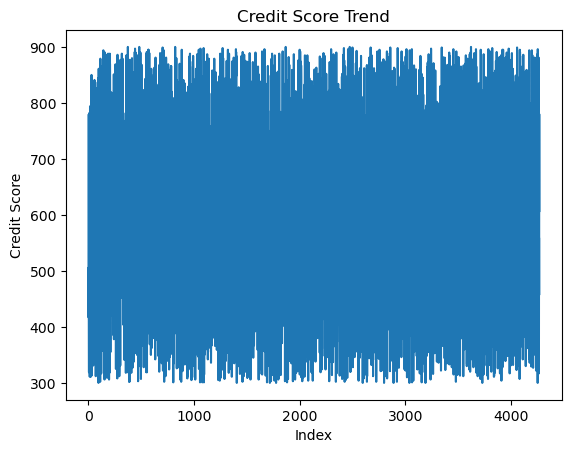

In [41]:
plt.plot(df.index, df['cibil_score'])
plt.xlabel('Index')
plt.ylabel('Credit Score')
plt.title('Credit Score Trend')
plt.show()


In [ ]:
df.to_csv('Cleaned Loan_approval_dataset')